<a href="https://colab.research.google.com/github/Rekyb415/Machine-Learning/blob/main/20521729_BaiThucHanh3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BAI 2

In [ ]:
PATH = 'drive/MyDrive/public_dataset/housing.csv'

In [ ]:
import pandas as pd 
data = pd.read_csv(PATH)

In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

imp = SimpleImputer(missing_values = np.nan,strategy='median')
X_process = imp.fit_transform(X.values.reshape(-1,1))


NameError: ignored

In [ ]:
X = data['total_bedrooms']
y = data['median_house_value']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1, 55))
y_transformed = scaler.fit_transform(y.values.reshape(-1, 1))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(1, 55))
y_train_transformed = sc.fit_transform(y_train.reshape(-1,1)).reshape(-1)
y_test_transformed = sc.fit_transform(y_test.reshape(-1,1)).reshape(-1)

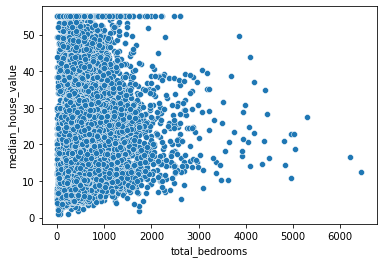

In [ ]:
import seaborn as sns
import pandas as pd
data_visualize = pd.DataFrame({"total_bedrooms": X_train, "median_house_value": y_train_transformed})
# Ve bieu do tan xa du lieu huan luyen
sns.scatterplot(data=data_visualize, x="total_bedrooms", y="median_house_value")

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train.values.reshape(-1,1), y_train_transformed)

LinearRegression()

In [ ]:
data.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [ ]:
y_pred = model.predict(X_test.values.reshape(-1,1))

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test_transformed, y_pred, squared =True)

170.2952354460387

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
kf = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
avg_mse = []
for train_index, test_index in kf.split(X, y_transformed):
 X_train = X.values[train_index].reshape(-1,1)
 y_train = y_transformed[train_index]
 X_test = X.values[test_index].reshape(-1,1)
 y_test = y_transformed[test_index]
 model = LinearRegression()
 model.fit(X_train, y_train)
 y_pred = model.predict(X_test)
 result = mean_squared_error(y_test, y_pred, squared=True)

 # Lưu lại kết quả từng fold vào avg_mse
 avg_mse.append(result)

In [ ]:
import numpy as np
np.mean(np.array(avg_mse))

166.22959787572225